Form Score(Batting) = (W1 * (Inns/Mat)) +(W2 * (NO/Inns)) +(W3 * (Runs/BF)) +(W4 * Ave) +(W5 * ((50s + 2 * 100s)/Inns)) + (W6 * (4’s+6’s)/BF) + (W7* Runs-(4’s*4+6’s*6)/Inns) – (W8 * (Zeros/Inns))


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def analyze_and_visualize(df):
    # Select Batting Features for Analysis
    features = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', "100's", "50's", "Zeros", '4s', '6s']
    df_analysis = df[features]
    
    # Replace infinities and NaN with 0
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)
    
    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    
    # Visualize Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Batting Features')
    plt.show()
    
    return df_analysis


In [23]:
def calculate_batting_formula_components(df):
    """
    Calculates the components of the Batting Consistency Score formula.
    Form Score(Batting) = (W1 * (Inns/Mat)) +(W2 * (NO/Inns)) +(W3 * (Runs/BF)) +(W4 * Ave) +(W5 * ((50s + 2 * 100s)/Inns)) + (W6 * (4’s+6’s)/BF) + (W7* Runs-(4’s*4+6’s*6)/Inns)
– (W8 * (Zeros/Inns))

    """
    df_components = df.copy()

    # Ensure numeric types for calculations (handle potential NaN from coercion)
    df_components['Mat'] = pd.to_numeric(df_components['Mat'], errors='coerce')
    df_components['Inns'] = pd.to_numeric(df_components['Inns'], errors='coerce')
    df_components['NO'] = pd.to_numeric(df_components['NO'], errors='coerce')
    df_components['Runs'] = pd.to_numeric(df_components['Runs'], errors='coerce')
    df_components['BF'] = pd.to_numeric(df_components['BF'], errors='coerce')
    df_components['Ave'] = pd.to_numeric(df_components['Ave'], errors='coerce')
    df_components["100's"] = pd.to_numeric(df_components["100's"], errors='coerce')
    df_components["50's"] = pd.to_numeric(df_components["50's"], errors='coerce')
    df_components["Zeros"] = pd.to_numeric(df_components["Zeros"], errors='coerce')
    df_components['4s'] = pd.to_numeric(df_components['4s'], errors='coerce')
    df_components['6s'] = pd.to_numeric(df_components['6s'], errors='coerce')

    # Replace infinities and NaN with 0
    df_components = df_components.replace([np.inf, -np.inf], 0).fillna(0)

    # Perform calculations, ensuring float division and handling potential NaN values
    df_components['Inns_per_Mat'] = df_components['Inns'].astype(float) / df_components['Mat'].astype(float)
    df_components['NO_per_Inns'] = df_components['NO'].astype(float) / df_components['Inns'].astype(float)
    df_components['Runs_per_BF'] = df_components['Runs'].astype(float) / df_components['BF'].astype(float)
    df_components['Ave_Score'] = df_components['Ave'].astype(float)  # Direct Ave
    df_components['50s100s_per_Inns'] = (df_components["50's"].astype(float) + 2 * df_components["100's"].astype(float)) / df_components['Inns'].astype(float)
    df_components['Boundaries_per_BF'] = (df_components["4s"].astype(float) + df_components["6s"].astype(float)) / df_components['BF'].astype(float)
    df_components['Runs_minus_Boundaries_per_Inns'] = (df_components['Runs'].astype(float) - (df_components["4s"].astype(float) * 4 + df_components["6s"].astype(float) * 6)) / df_components['Inns'].astype(float)
    df_components['Zeros_per_Inns'] = df_components["Zeros"].astype(float) / df_components['Inns'].astype(float)

    return df_components


In [24]:
data = pd.read_excel("../../last season cleaned data/lastseasoniplbatting.xlsx")
df = data.copy()
print("Data types of your columns before calculation:")


Data types of your columns before calculation:


In [25]:
numeric_cols = ['Inns', 'Mat', 'NO', 'Runs', 'BF', 'Ave', "100's", "50's", "Zeros" , '4s', '6s']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Use df here

# Verify data types AFTER explicit conversion
print("\nData types of your columns AFTER explicit numeric conversion:")
print(df.dtypes)  # Use df here

# --- Correctly Remove Rows with NaN Values ---
cols_to_check_nan = ['Inns', 'Mat', 'NO', 'Runs', 'BF', 'Ave', "100's", "50's", "Zeros", '4s', '6s']
print("\nNumber of NaN values BEFORE removing:")
print(df[cols_to_check_nan].isna().sum())  # Check NaN counts in relevant columns before removal

df_cleaned = df.dropna(subset=cols_to_check_nan, how='any')  # Use how='any' to drop row if ANY of these cols is NaN
print("\nNumber of rows BEFORE removing NaNs:", len(df))
print("Number of rows AFTER removing NaNs:", len(df_cleaned))  # Print length of df_cleaned

# Calculate batting formula components using the CLEANED data (df_cleaned)
calculations_with_data = calculate_batting_formula_components(df_cleaned)  # Pass df_cleaned

# Select the component columns for correlation analysis
component_columns = [
    'Inns_per_Mat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Boundaries_per_BF',
    'Runs_minus_Boundaries_per_Inns'
    
]

# Calculate the correlation matrix for the components
correlation_matrix = calculations_with_data[component_columns].corr()  # Use calculations_with_data

# Display the correlation matrix
print("\nCorrelation Matrix of Batting Consistency Formula Components (after NaN removal):")
print(correlation_matrix)



Data types of your columns AFTER explicit numeric conversion:
Player     object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS          int64
Ave       float64
BF          int64
SR        float64
100's       int64
50's        int64
Zeros       int64
4s          int64
6s          int64
Type       object
dtype: object

Number of NaN values BEFORE removing:
Inns     0
Mat      0
NO       0
Runs     0
BF       0
Ave      0
100's    0
50's     0
Zeros    0
4s       0
6s       0
dtype: int64

Number of rows BEFORE removing NaNs: 63
Number of rows AFTER removing NaNs: 63

Correlation Matrix of Batting Consistency Formula Components (after NaN removal):
                                Inns_per_Mat  NO_per_Inns  Runs_per_BF  \
Inns_per_Mat                        1.000000    -0.233219     0.013370   
NO_per_Inns                        -0.233219     1.000000     0.481588   
Runs_per_BF                         0.013370     0.481588     1.000000   
Ave_Score            

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_batting_consistency_components(df_components):
    features = [
        'Inns_per_Mat',
        'NO_per_Inns',
        'Runs_per_BF',
        'Ave_Score',
        '50s100s_per_Inns',
        'Zeros_per_Inns',
        'Boundaries_per_BF',
        'Runs_minus_Boundaries_per_Inns'
    ]
    df_analysis = df_components[features].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Replace infinities and NaN with 0 - Handle potential issues from calculations
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)

    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)  # Added fmt and linewidths for better readability
    plt.title('Correlation Matrix of Batting Consistency Formula Components')
    plt.show()

    return df_analysis


                                Inns_per_Mat  NO_per_Inns  Runs_per_BF  \
Inns_per_Mat                        1.000000    -0.233219     0.013370   
NO_per_Inns                        -0.233219     1.000000     0.481588   
Runs_per_BF                         0.013370     0.481588     1.000000   
Ave_Score                           0.156479     0.567743     0.750167   
50s100s_per_Inns                    0.265996     0.102749     0.534412   
Zeros_per_Inns                      0.045433    -0.017910    -0.187340   
Boundaries_per_BF                   0.042077     0.357888     0.941190   
Runs_minus_Boundaries_per_Inns      0.296565     0.119646     0.299738   

                                Ave_Score  50s100s_per_Inns  Zeros_per_Inns  \
Inns_per_Mat                     0.156479          0.265996        0.045433   
NO_per_Inns                      0.567743          0.102749       -0.017910   
Runs_per_BF                      0.750167          0.534412       -0.187340   
Ave_Score        

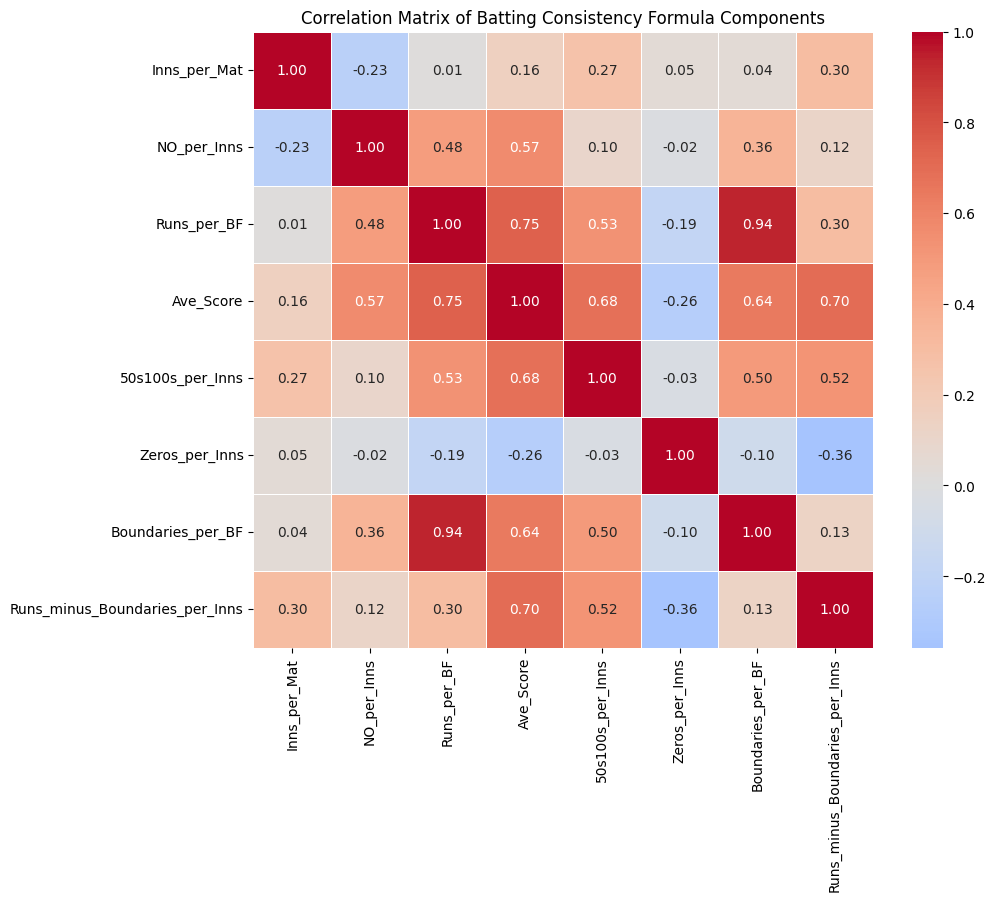

In [27]:
analyzed_df = analyze_batting_consistency_components(calculations_with_data)


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Assuming calculations_with_data is your DataFrame after computing the batting derived metrics,
# and that it includes the following component columns:
features = [
    'Inns_per_Mat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Boundaries_per_BF',
    'Runs_minus_Boundaries_per_Inns'
]

#########################################
# 1. Principal Component Analysis (PCA)
#########################################

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# You can use the loadings for PC1 (which explains most variance) as guidance for the weights:
pc1_loadings = loadings['PC1']
# Normalize the PC1 loadings (absolute values) to sum to 1:
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

#########################################
# 2. Analytic Hierarchy Process (AHP)
#########################################

# For AHP, you typically have expert input in the form of a pairwise comparison matrix.
# Here’s an example pairwise comparison matrix for the 6 criteria. 
# (You should adjust these values based on domain expertise.)
pairwise_matrix = np.array([
     [1,    2,    3,    4,    5,    6,    7,    8],
    [1/2,  1,    2,    3,    4,    5,    6,    7],
    [1/3,  1/2,  1,    2,    3,    4,    5,    6],
    [1/4,  1/3,  1/2,  1,    2,    3,    4,    5],
    [1/5,  1/4,  1/3,  1/2,  1,    2,    3,    4],
    [1/6,  1/5,  1/4,  1/3,  1/2,  1,    2,    3],
    [1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1,    2],
    [1/8,  1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1]
])

# Calculate the principal eigenvector of the pairwise matrix
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
# Normalize to sum to 1
ahp_weights = ahp_weights / ahp_weights.sum()

# Create a Series with these weights for clarity
ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

#########################################
# 3. Optimization-Based Approach
#########################################

# Define a function to calculate the composite consistency score given a set of weights.
def consistency_score(weights, df):
    # weights: array of shape (6,)
    # df: DataFrame containing the metrics in the order of 'features'
    return np.dot(df[features].values, weights)

# Define an objective function.
# In this example, we aim to maximize the variance of the consistency score.
# (Maximizing variance might help differentiate between players.)
def objective(weights, df):
    scores = consistency_score(weights, df)
    # We minimize the negative variance.
    return -np.var(scores)

# Set initial weights (equal distribution)
initial_weights = np.ones(len(features)) / len(features)
# Define bounds if needed (here we constrain weights between 0 and 1)
bounds = [(0, 1)] * len(features)

# Run the optimization
result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()  # Normalize to sum to 1

# Display the optimized weights
optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                                     PC1       PC2       PC3       PC4  \
Inns_per_Mat                    0.087303  0.590502  0.382768 -0.040928   
NO_per_Inns                     0.271998 -0.463724 -0.137609  0.575033   
Runs_per_BF                     0.466541 -0.238799  0.111379 -0.288427   
Ave_Score                       0.498185  0.044649 -0.081047  0.237468   
50s100s_per_Inns                0.386921  0.258257  0.257536  0.024494   
Zeros_per_Inns                 -0.147227 -0.157143  0.773417  0.456842   
Boundaries_per_BF               0.420013 -0.262189  0.247057 -0.450177   
Runs_minus_Boundaries_per_Inns  0.323654  0.465956 -0.300071  0.340759   

                                     PC5       PC6       PC7       PC8  
Inns_per_Mat                    0.687379  0.143142 -0.048020 -0.014590  
NO_per_Inns                     0.395448  0.322658 -0.236800  0.211699  
Runs_per_BF                     0.070007 -0.237333 -0.484526 

In [31]:
import pandas as pd

# Full list of batting metrics
features = ['Inns_per_Mat', 'NO_per_Inns', 'Runs_per_BF', 
            'Ave_Score', '50s100s_per_Inns', 'Zeros_per_Inns', 'Boundaries_per_BF',
            'Runs_minus_Boundaries_per_Inns']

# Original AHP weights from expert pairwise comparisons for batting metrics (updated values)
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.382497,
    'NO_per_Inns': 0.250402,
    'Runs_per_BF': 0.159580,
    'Ave_Score': 0.100630,
    '50s100s_per_Inns': 0.064077,
    'Zeros_per_Inns': 0.042813,
    'Boundaries_per_BF': 0.032698,
    'Runs_minus_Boundaries_per_Inns': 0.023562
})

# Original PCA weights derived from PC1 loadings for batting metrics (updated values)
pca_weights = pd.Series({
    'Ave_Score': 0.270854,
    '50s100s_per_Inns': 0.251713,
    'Runs_per_BF': 0.239658,
    'Inns_per_Mat': 0.104155,
    'Zeros_per_Inns': 0.077609,
    'NO_per_Inns': 0.056012,
    'Boundaries_per_BF': 0.161429,
    'Runs_minus_Boundaries_per_Inns': 0.124394
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors for specific batting metrics
boost_factors = {
    'Inns_per_Mat': 1.0,
    'NO_per_Inns': 1.0,
    'Runs_per_BF': 2.0,
    'Ave_Score': 2.0,
    '50s100s_per_Inns': 2.0,
    'Zeros_per_Inns': 1.0,
    'Boundaries_per_BF': 1.0,
    'Runs_minus_Boundaries_per_Inns': 1.0
}

# Apply the boost factors
hybrid_weights_boosted = hybrid_weights * pd.Series(boost_factors)

# Normalize again to ensure the weights sum to exactly 1
hybrid_weights_boosted /= hybrid_weights_boosted.sum()

# Verify that the sum of weights is exactly 1
sum_of_weights = hybrid_weights_boosted.sum()

# Output results
print(hybrid_weights_boosted)
print("Sum of weights:", sum_of_weights)


50s100s_per_Inns                  0.145314
Ave_Score                         0.186513
Boundaries_per_BF                 0.042601
Inns_per_Mat                      0.199453
NO_per_Inns                       0.128533
Runs_minus_Boundaries_per_Inns    0.032050
Runs_per_BF                       0.232162
Zeros_per_Inns                    0.033373
dtype: float64
Sum of weights: 0.9999999999999999


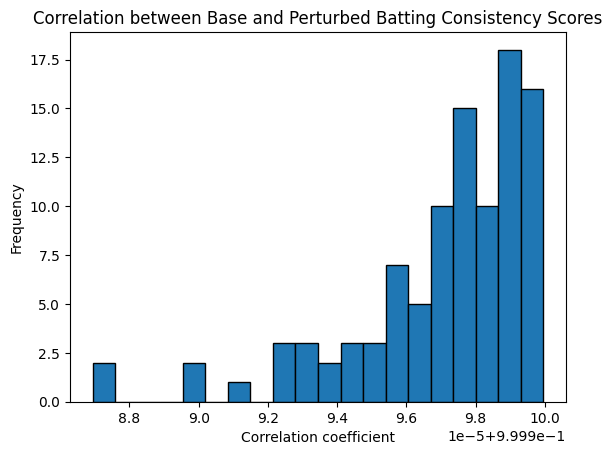

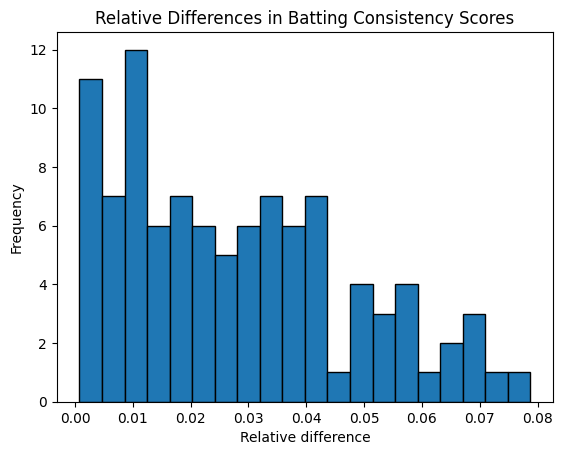

Mean correlation: 0.9999970780713113
Mean relative difference: 0.028006085116312068


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'calculations_with_data' is your DataFrame containing the batting derived metrics
# and 'hybrid_weights_boosted' is your final weight Series with the index corresponding to:
features = ['Inns_per_Mat', 'NO_per_Inns', 'Runs_per_BF', 
            'Ave_Score', '50s100s_per_Inns', 'Zeros_per_Inns', 'Boundaries_per_BF',
            'Runs_minus_Boundaries_per_Inns']

# Define a function to compute the composite consistency score for batting
def compute_consistency_score(df, weights):
    # Make sure the DataFrame columns are in the same order as weights.index
    return np.dot(df[weights.index].values, weights.values)

# Compute the base consistency scores with your nominal batting weights
base_scores = compute_consistency_score(calculations_with_data, hybrid_weights_boosted)

# Set up sensitivity analysis parameters
n_iterations = 100  # Number of perturbation iterations
perturbation_factor = 0.05  # 5% noise
perturbed_scores_list = []

# Generate perturbed weights and compute the corresponding consistency scores
for i in range(n_iterations):
    # Create random noise: normally distributed noise with 0 mean and 5% standard deviation
    noise = np.random.normal(loc=0, scale=perturbation_factor, size=len(hybrid_weights_boosted))
    
    # Apply the noise multiplicatively to each weight
    perturbed_weights = hybrid_weights_boosted * (1 + noise)
    
    # Renormalize to ensure the weights sum to 1
    perturbed_weights = perturbed_weights / perturbed_weights.sum()
    
    # Compute consistency score with perturbed weights
    perturbed_scores = compute_consistency_score(calculations_with_data, perturbed_weights)
    perturbed_scores_list.append(perturbed_scores)

# For each perturbed set, compute the correlation with the base scores
correlations = [np.corrcoef(base_scores, scores)[0, 1] for scores in perturbed_scores_list]

# Also compute the mean relative difference between perturbed scores and base scores
relative_differences = [
    np.mean(np.abs(scores - base_scores)) / np.mean(np.abs(base_scores))
    for scores in perturbed_scores_list
]

# Plot the distribution of correlation coefficients
plt.hist(correlations, bins=20, edgecolor='k')
plt.title("Correlation between Base and Perturbed Batting Consistency Scores")
plt.xlabel("Correlation coefficient")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of relative differences
plt.hist(relative_differences, bins=20, edgecolor='k')
plt.title("Relative Differences in Batting Consistency Scores")
plt.xlabel("Relative difference")
plt.ylabel("Frequency")
plt.show()

# Print summary statistics
print("Mean correlation:", np.mean(correlations))
print("Mean relative difference:", np.mean(relative_differences))


# FINAL Form SCORE CALCULATION
### Form Score (Batting) = (0.199453 × (Inns / Mat)) + (0.128533 × (NO / Inns)) + (0.232162 × (Runs / BF)) + (0.186513 × Ave) + (0.145314 × ((50s + 2 × 100s) / Inns)) + (0.042601 × ((4's + 6's) / BF)) + (0.032050 × (Runs - (4's × 4 + 6's × 6)) / Inns) – (0.033373 × (Zeros / Inns))